In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names = column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles, on= 'item_id')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
rating['number of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [14]:
rating.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


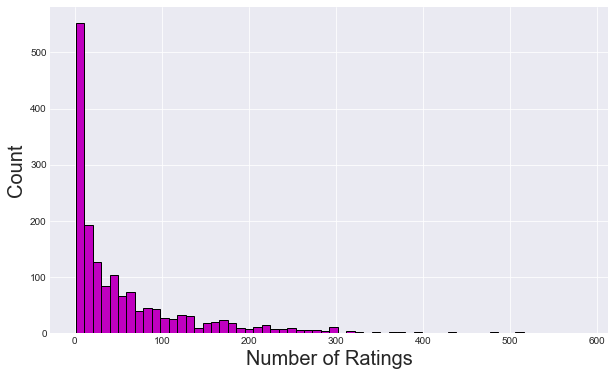

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.hist(rating['number of rating'],bins = 60, edgecolor = 'k',color ='m')
plt.xlabel('Number of Ratings',size = 20)
plt.ylabel('Count',size = 20)
plt.show()

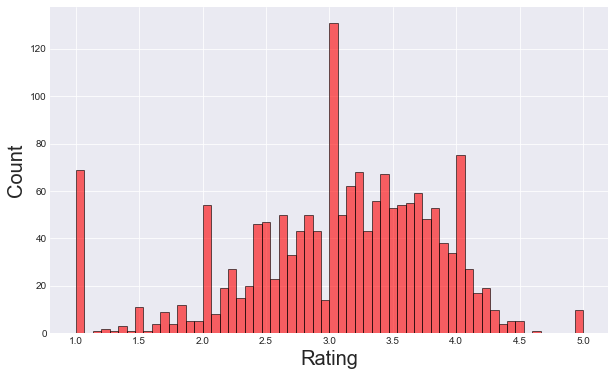

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.hist(rating['rating'],bins = 60, edgecolor = 'k',color ='r',alpha = 0.6)
plt.xlabel('Rating',size = 20)
plt.ylabel('Count',size = 20)
plt.show()

Text(4.05,0.5,'Number of Rating')

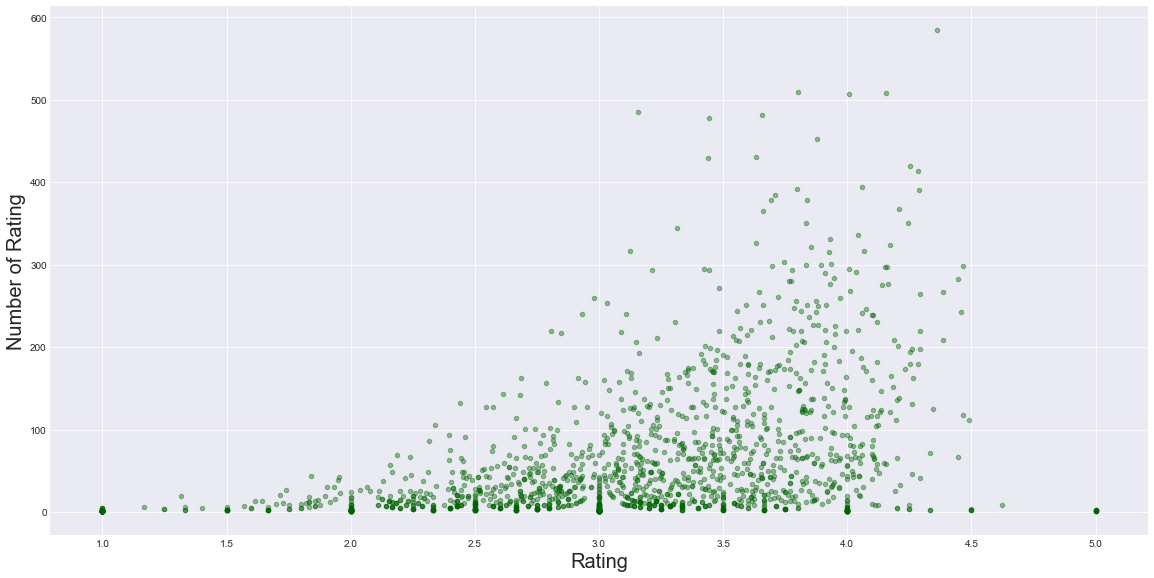

In [48]:
sns.lmplot('rating','number of rating', data = rating, fit_reg= False,size = 8,aspect =2,
          scatter_kws= {'s':20,'color':'darkgreen','alpha':0.4})
plt.xlabel('Rating',size = 20)
plt.ylabel('Number of Rating',size = 20)

In [49]:
moviemat = df.pivot_table(values ='rating',index = 'user_id',columns = 'title')

In [50]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [62]:
rating.sort_values('number of rating',ascending = False).head()

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [73]:
starwars_user_rating = moviemat['Star Wars (1977)']
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [88]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating) # correlation between starwars and other movies

C:\Users\Ehtasham\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ehtasham\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [89]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)

C:\Users\Ehtasham\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ehtasham\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [113]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['Correlation'])
corr_starwars.dropna(inplace=True)

In [114]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [115]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [116]:
# taking only those movies that were rated at least 100 times
corr_starwars = corr_starwars.join(rating['number of rating'])

In [120]:
recom_starwars = corr_starwars[corr_starwars['number of rating']>100].sort_values('number of rating',ascending = False)

In [130]:
recom_starwars.head()

,Correlation,number of rating
title,,
Star Wars (1977),1.000000,584
Contact (1997),0.134962,509
Fargo (1996),0.044415,508
Return of the Jedi (1983),0.672556,507
Liar Liar (1997),0.150292,485


# Recommendation for liar liar movie

In [131]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns = ['Correlation'])
corr_starwars.dropna(inplace=True)

In [132]:
corr_liarliar = corr_liarliar.join(rating['number of rating'])

In [134]:
recom_liarliar = corr_liarliar[corr_liarliar['number of rating']>100].sort_values('Correlation',ascending = False)

In [136]:
recom_liarliar.head(20)

,Correlation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
